In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('IMDb.csv')

In [4]:
df.head()

,avg_vote,budget,worldwide_gross_income
0,7.1,650000,17
1,4.0,2000000,30
2,5.3,1000000,32
3,NaN,424,33
4,3.5,2500,51


In [5]:
type('avg_vote')

str

In [6]:
type('budget')

str

In [7]:
type('worldwide_gross_income')

str

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 3 columns):
avg_vote                  8908 non-null float64
budget                    8909 non-null int64
worldwide_gross_income    8909 non-null int64
dtypes: float64(1), int64(2)
memory usage: 208.9 KB


In [9]:
df.describe(include='all')

,avg_vote,budget,worldwide_gross_income
count,8908.000000,8.909000e+03,8.909000e+03
mean,6.204187,2.469973e+07,6.568874e+07
std,1.112756,3.564341e+07,1.529164e+08
min,1.100000,1.800000e+01,1.700000e+01
25%,5.600000,4.000000e+06,9.420410e+05
50%,6.300000,1.200000e+07,1.231332e+07
75%,7.000000,3.000000e+07,5.783575e+07
max,9.300000,3.560000e+08,2.797801e+09


In [10]:
df.isnull().sum()

avg_vote                  1
budget                    0
worldwide_gross_income    0
dtype: int64

In [11]:
df1=df.dropna()

In [12]:
df1.isnull().sum()

avg_vote                  0
budget                    0
worldwide_gross_income    0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 8908
Data columns (total 3 columns):
avg_vote                  8908 non-null float64
budget                    8908 non-null int64
worldwide_gross_income    8908 non-null int64
dtypes: float64(1), int64(2)
memory usage: 278.4 KB


In [14]:
df1 = df.convert_objects(convert_numeric=True)

C:\Users\quinn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 3 columns):
avg_vote                  8908 non-null float64
budget                    8909 non-null int64
worldwide_gross_income    8909 non-null int64
dtypes: float64(1), int64(2)
memory usage: 208.9 KB


In [16]:
df2=df1.reset_index(drop=True)

In [17]:
df2.corr()

,avg_vote,budget,worldwide_gross_income
avg_vote,1.000000,0.113214,0.218702
budget,0.113214,1.000000,0.753796
worldwide_gross_income,0.218702,0.753796,1.000000


In [18]:
df2.head()

,avg_vote,budget,worldwide_gross_income
0,7.1,650000,17
1,4.0,2000000,30
2,5.3,1000000,32
3,NaN,424,33
4,3.5,2500,51


In [19]:
df3=df2.dropna()

In [20]:
df3.isnull().sum()

avg_vote                  0
budget                    0
worldwide_gross_income    0
dtype: int64

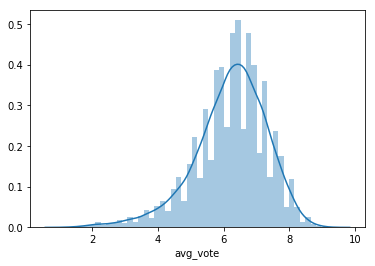

In [21]:
sns.distplot(df3['avg_vote'])

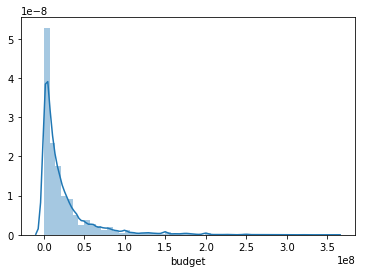

In [22]:
sns.distplot(df3['budget'])

In [23]:
df4=df3.reset_index(drop=True)

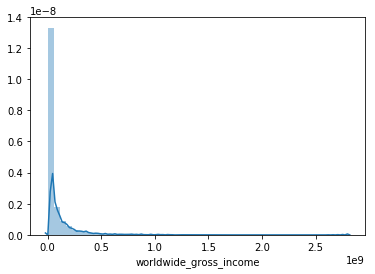

In [24]:
sns.distplot(df3['worldwide_gross_income'])

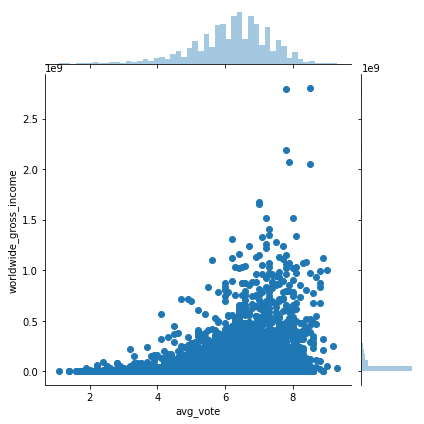

In [25]:
sns.jointplot(data=df3, x='avg_vote', y = 'worldwide_gross_income')

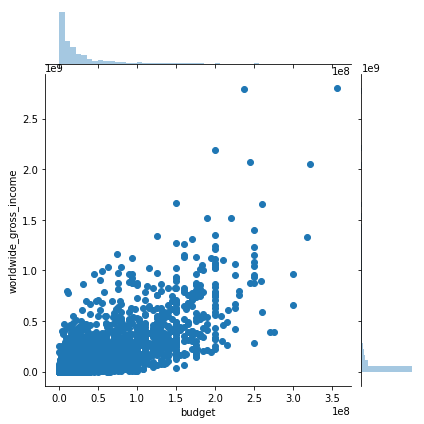

In [26]:
sns.jointplot(data=df3, x='budget', y = 'worldwide_gross_income')

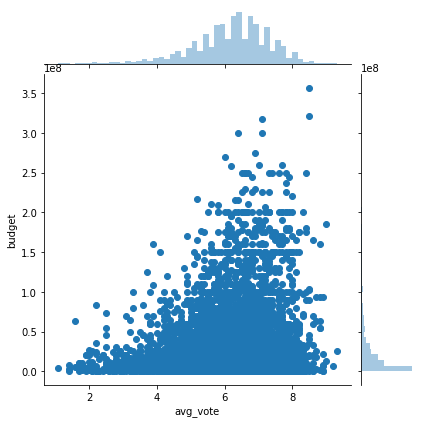

In [27]:
sns.jointplot(data=df2, x='avg_vote', y = 'budget')

In [28]:
x=df3[['avg_vote', 'budget']]

In [29]:
y=df3[['worldwide_gross_income']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(lm.intercept_)

[-1.31008191e+08]


In [34]:
lm.coef_

array([[1.87426150e+07, 3.30533948e+00]])

In [35]:
predictions = lm.predict(x_test)

In [36]:
predictions

array([[-7.10387728e+06],
       [-3.13981225e+07],
       [ 1.97820221e+07],
       ...,
       [ 4.63633391e+07],
       [ 1.71726111e+08],
       [ 2.11456509e+07]])

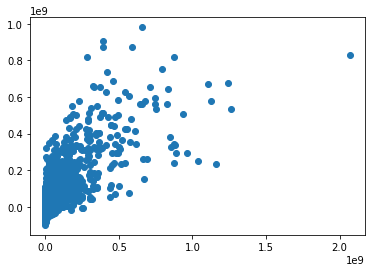

In [37]:
plt.scatter(y_test,predictions)

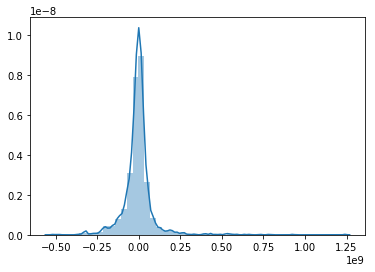

In [38]:
sns.distplot((y_test-predictions))

In [39]:
from sklearn import metrics

In [40]:
metrics.mean_absolute_error(y_test, predictions)

52108203.01408287

In [41]:
metrics.mean_squared_error(y_test, predictions)

9209732950142426.0

In [42]:
#RMSE

In [43]:
np.sqrt(metrics.mean_absolute_error(y_test, predictions))

7218.601181259626

In [ ]:
R-Squared

In [46]:
metrics.r2_score(y_test, predictions)

0.5237639027411527